In [1]:
# initial setup
try:
    # settings colab:
    import google.colab
        
except ModuleNotFoundError:    
    # settings local:
    %run "common/0_notebooks_base_setup.py"

default checking
Running command `conda list`... ok
jupyterlab=1.2.6 already installed
pandas=1.0.3 already installed
matplotlib=2.2.2 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed
ipywidgets=7.5.1 already installed
pytest=5.3.4 already installed
chardet=3.0.4 already installed
psutil=5.7.0 already installed
scipy=1.4.1 already installed
statsmodels=0.11.0 already installed
scikit-learn=0.22.1 already installed
xlrd=1.2.0 already installed
plotly=4.6.0 already installed
chart-studio=1.1.0 already installed
plotly-orca=1.3.1 already installed
Running command `conda install --yes unicodedata2`... ok
Solving environment: ...working... done

# All requested packages already installed.


Importando librerías ...
Las librerías has sido importadas con éxito


In [2]:
data_clean = pd.read_csv("CleanCSV/Clean03_PreciosYSuperficie.csv")

<hr id="Outliers">
<h2 style="color: lightblue">OUTLIERS</h2>

In [3]:
#TABLA NULOS POR COLUMNA
data_null_pct = round(data_clean.isnull().sum() / data_clean.shape[0] * 100, 2).to_frame()
data_null_count = data_clean.isnull().sum().to_frame()
#data_null_table = data_null_count.join(data_null_avg)
#data_null_table
data_null_count.rename(columns={0:'cantidad'}, inplace=True)
data_null_pct.rename(columns={0:'pct'}, inplace=True)
data_null_table = data_null_count.join(data_null_pct)
data_null_table

,cantidad,pct
Unnamed: 0,0,0.00
index,0,0.00
operation,0,0.00
property_type,0,0.00
place_name,23,0.02
place_with_parent_names,0,0.00
country_name,0,0.00
state_name,0,0.00
geonames_id,18717,15.44
lat-lon,51550,42.53


### Ver distribución y outliers de price_usd_per_m2

In [4]:
dsApartment = data_clean[data_clean.property_type == "apartment"]
dsPH = data_clean[data_clean.property_type == "PH"]
dsHouse = data_clean[data_clean.property_type == "house"]
dsStore = data_clean[data_clean.property_type == "store"]

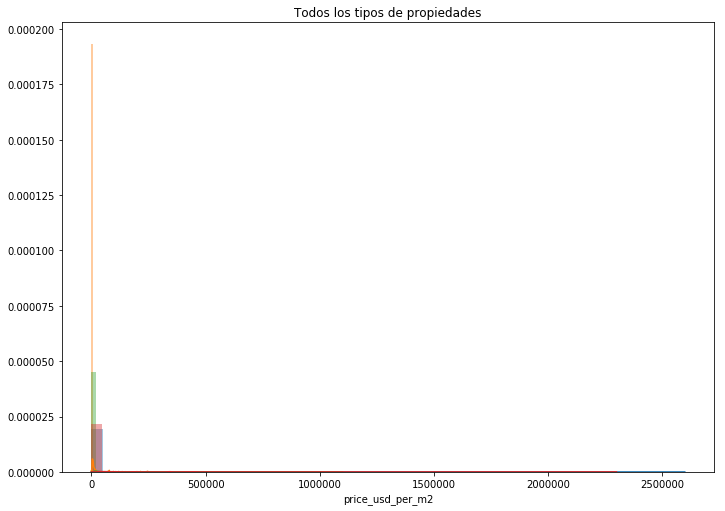

In [5]:
# veamos como se distribuye la variable price_usd_per_m2
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Todos los tipos de propiedades")
sns.distplot(dsApartment.price_usd_per_m2, ax=ax);
sns.distplot(dsPH.price_usd_per_m2, ax=ax);
sns.distplot(dsHouse.price_usd_per_m2, ax=ax);
sns.distplot(dsStore.price_usd_per_m2, ax=ax);

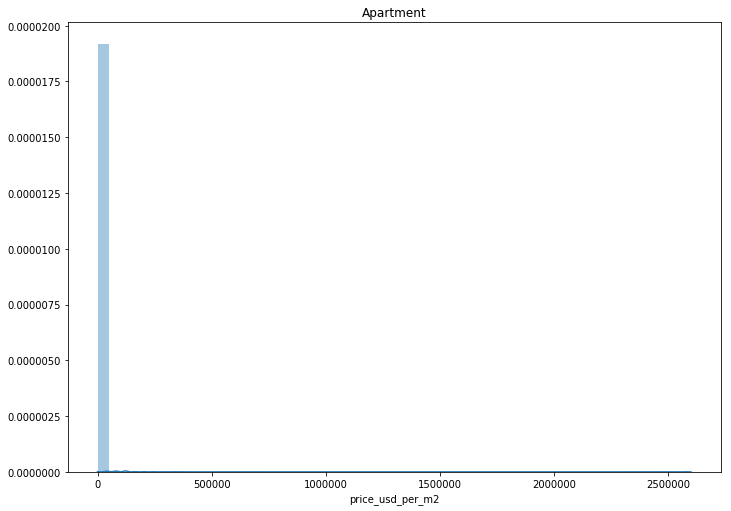

In [6]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.distplot(dsApartment.price_usd_per_m2, ax=ax);

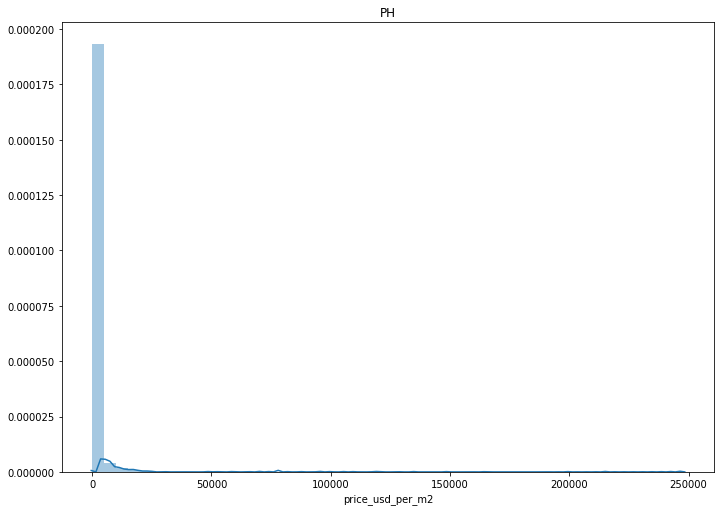

In [7]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.distplot(dsPH.price_usd_per_m2, ax=ax);

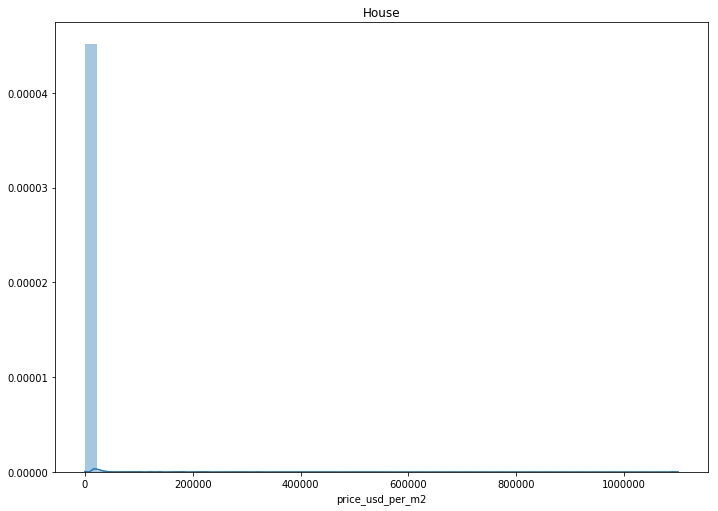

In [8]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.distplot(dsHouse.price_usd_per_m2, ax=ax);

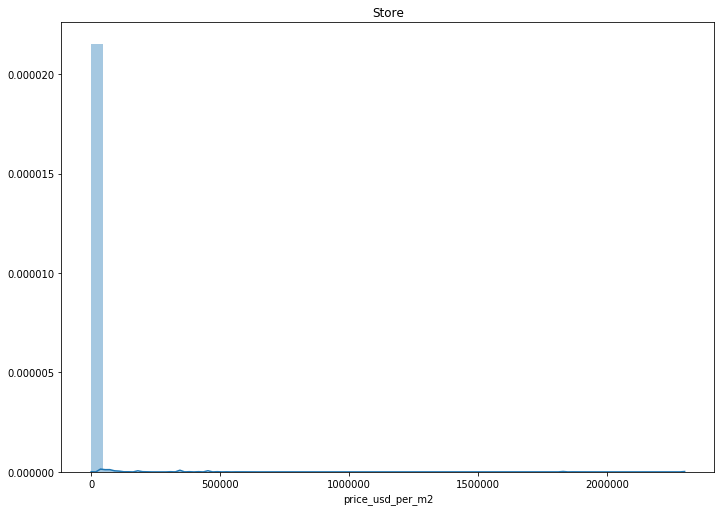

In [9]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.distplot(dsStore.price_usd_per_m2, ax=ax);

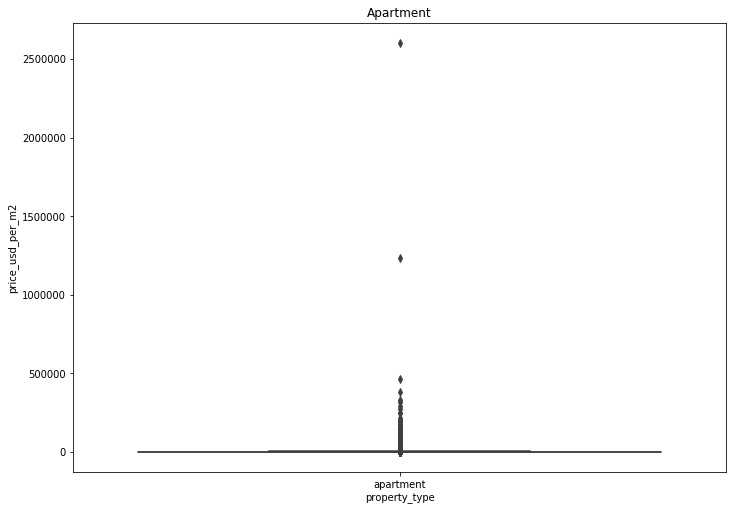

In [10]:
# grafico boxplot de price_usd_per_m2 para detectar outliers. En el grafico veo que a partir de 5 k ya es outlier
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.boxplot(ax=ax, x="property_type", y="price_usd_per_m2", data=dsApartment);

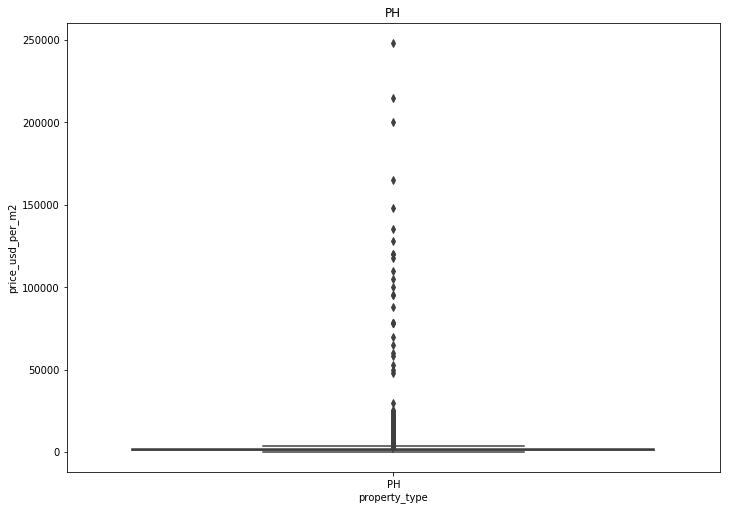

In [11]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.boxplot(ax=ax, x="property_type", y="price_usd_per_m2", data=dsPH);

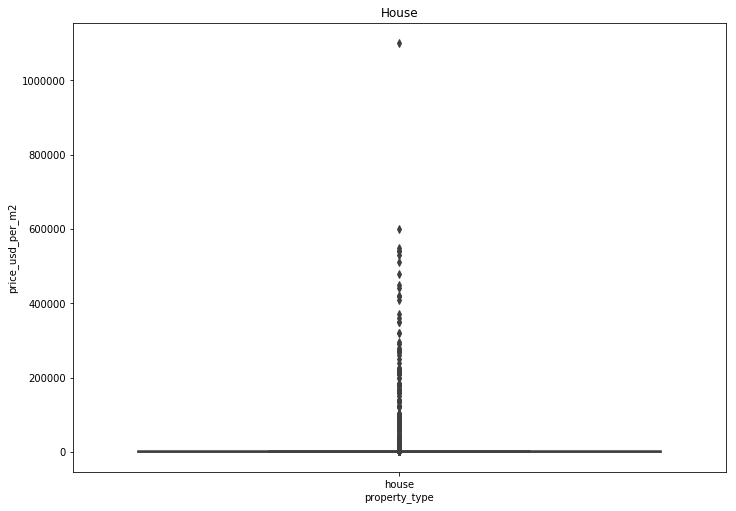

In [12]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.boxplot(ax=ax, x="property_type", y="price_usd_per_m2", data=dsHouse);

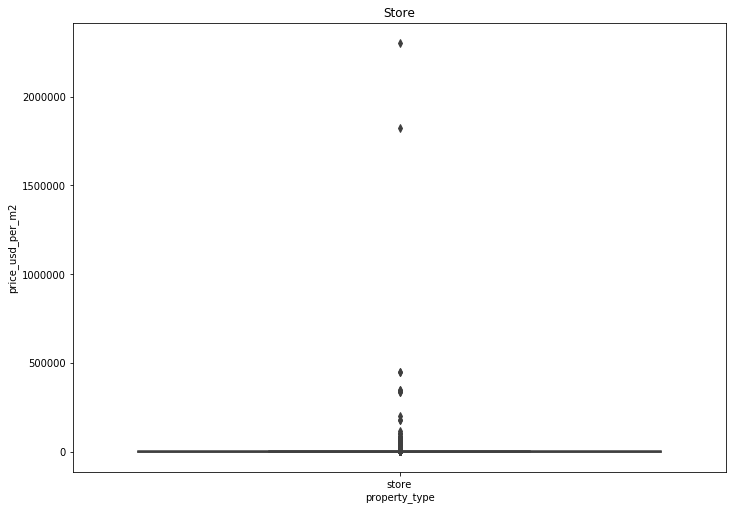

In [13]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.boxplot(ax=ax, x="property_type", y="price_usd_per_m2", data=dsStore);

In [15]:
# me fijo cuantos casos tengo por encima de usd 5000 y los considero outliers.
mask_outliers_price_usd_m2 = (data_clean.price_usd_per_m2 > 5000) | (data_clean.price_usd_per_m2 < 200)
print(mask_outliers_price_usd_m2.sum())

5258


In [17]:
# Reemplazo los valores de outliers por NaN para no borrar información de las otras columnas que pueda ser util
data_clean.loc[mask_outliers_price_usd_m2, "price_usd_per_m2"] = np.NaN

### Distribución de price_usd_per_m2 luego de eliminar outliers

In [18]:
dsApartment = data_clean[data_clean.property_type == "apartment"]
dsPH = data_clean[data_clean.property_type == "PH"]
dsHouse = data_clean[data_clean.property_type == "house"]
dsStore = data_clean[data_clean.property_type == "store"]

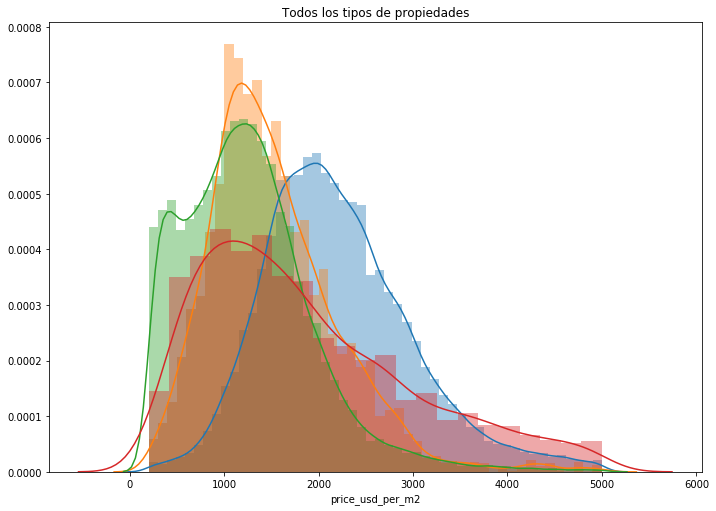

In [19]:
# veamos como se distribuye la variable price_usd_per_m2
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Todos los tipos de propiedades")
sns.distplot(dsApartment.price_usd_per_m2, ax=ax);
sns.distplot(dsPH.price_usd_per_m2, ax=ax);
sns.distplot(dsHouse.price_usd_per_m2, ax=ax);
sns.distplot(dsStore.price_usd_per_m2, ax=ax);

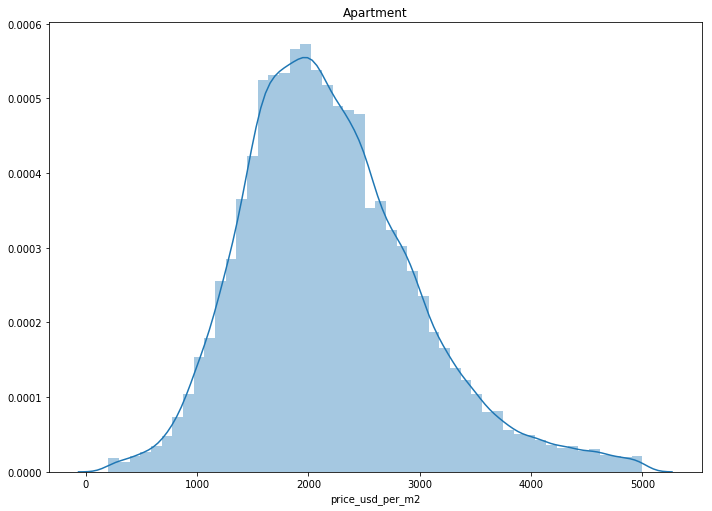

In [20]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.distplot(dsApartment.price_usd_per_m2, ax=ax);

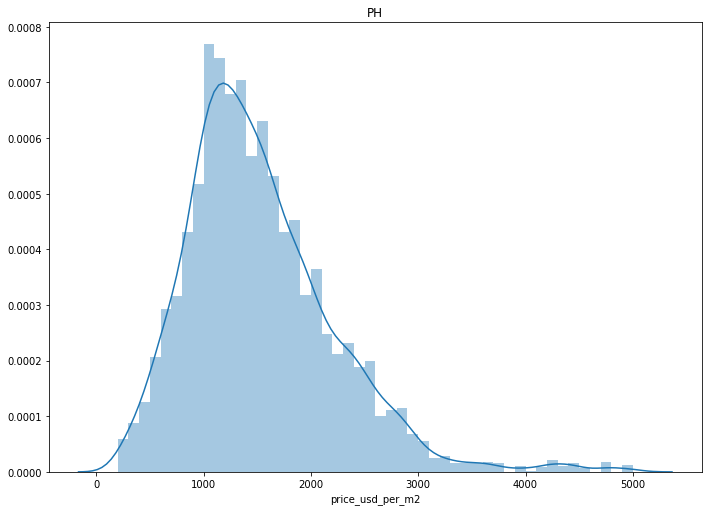

In [21]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.distplot(dsPH.price_usd_per_m2, ax=ax);

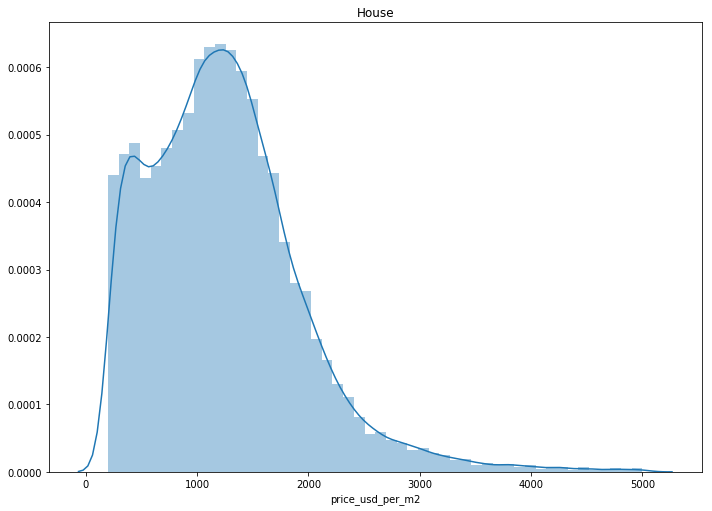

In [22]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.distplot(dsHouse.price_usd_per_m2, ax=ax);

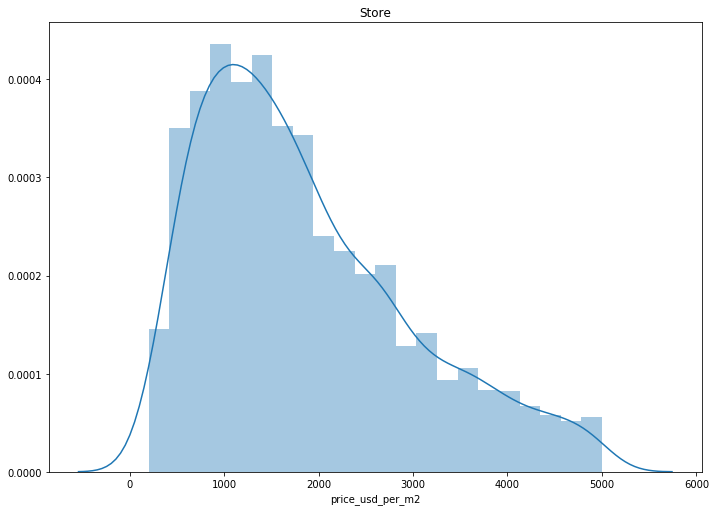

In [23]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.distplot(dsStore.price_usd_per_m2, ax=ax);

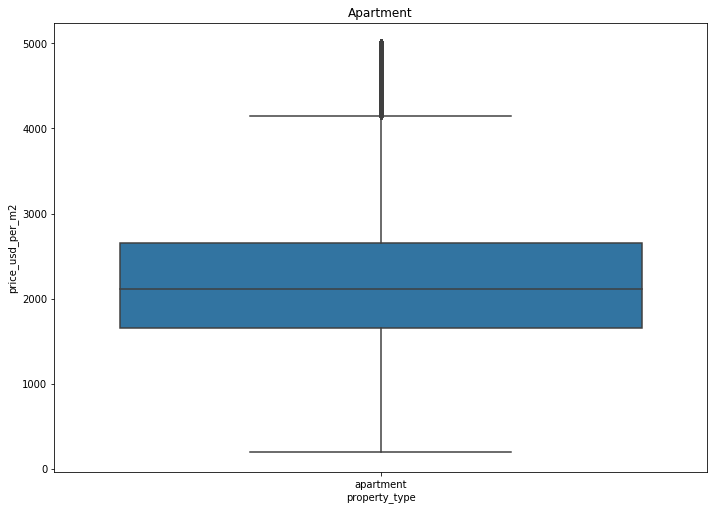

In [24]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.boxplot(ax=ax, x="property_type", y="price_usd_per_m2", data=dsApartment);

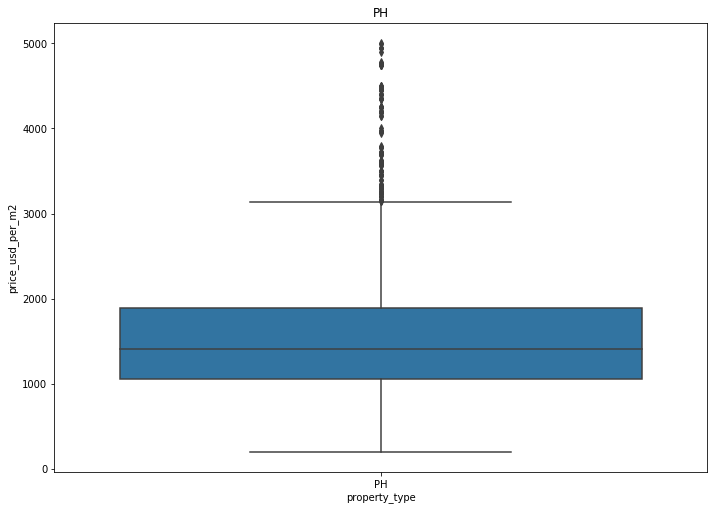

In [25]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.boxplot(ax=ax, x="property_type", y="price_usd_per_m2", data=dsPH);

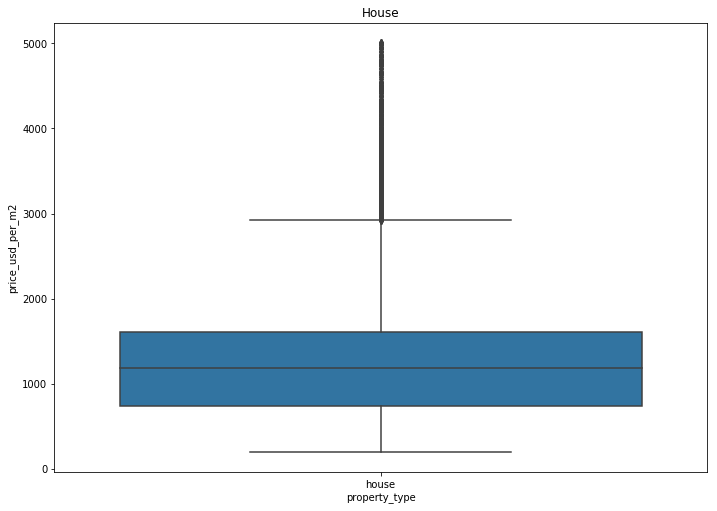

In [26]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.boxplot(ax=ax, x="property_type", y="price_usd_per_m2", data=dsHouse);

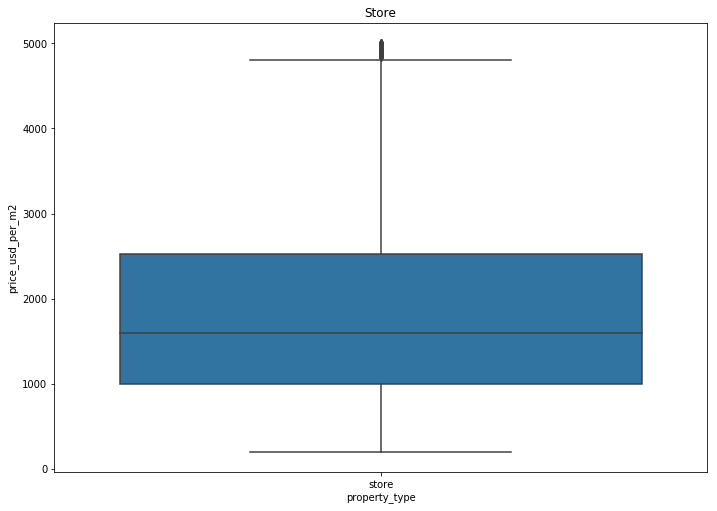

In [27]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.boxplot(ax=ax, x="property_type", y="price_usd_per_m2", data=dsStore);

### Ver distribución y outliers de price_aprox_usd

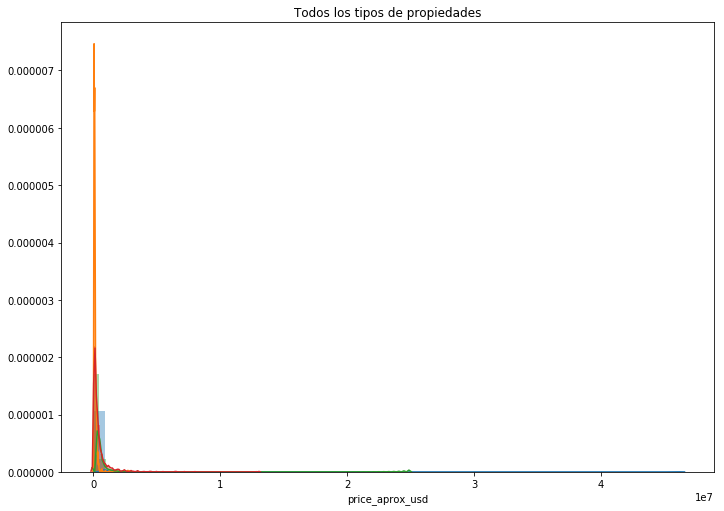

In [28]:
# veamos como se distribuye la variable price_aprox_usd
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Todos los tipos de propiedades")
sns.distplot(dsApartment.price_aprox_usd, ax=ax);
sns.distplot(dsPH.price_aprox_usd, ax=ax);
sns.distplot(dsHouse.price_aprox_usd, ax=ax);
sns.distplot(dsStore.price_aprox_usd, ax=ax);

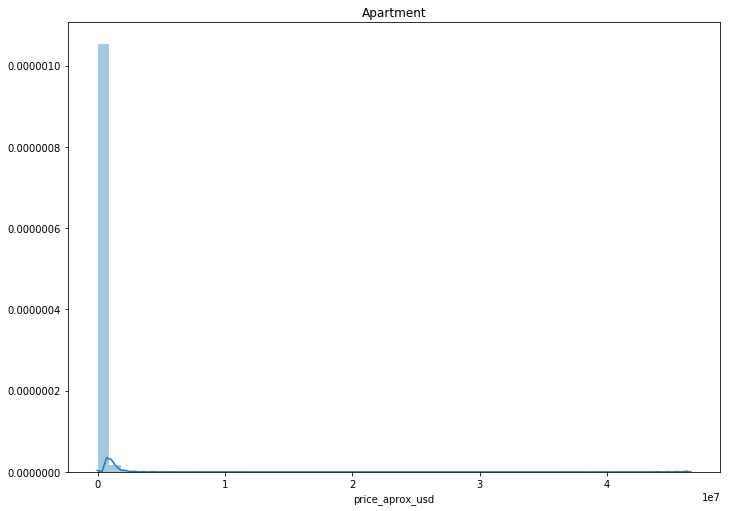

In [29]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.distplot(dsApartment.price_aprox_usd, ax=ax);

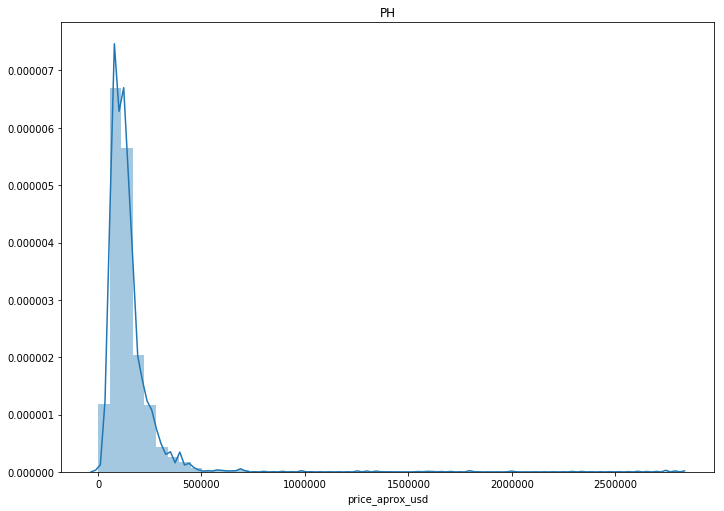

In [30]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.distplot(dsPH.price_aprox_usd, ax=ax);

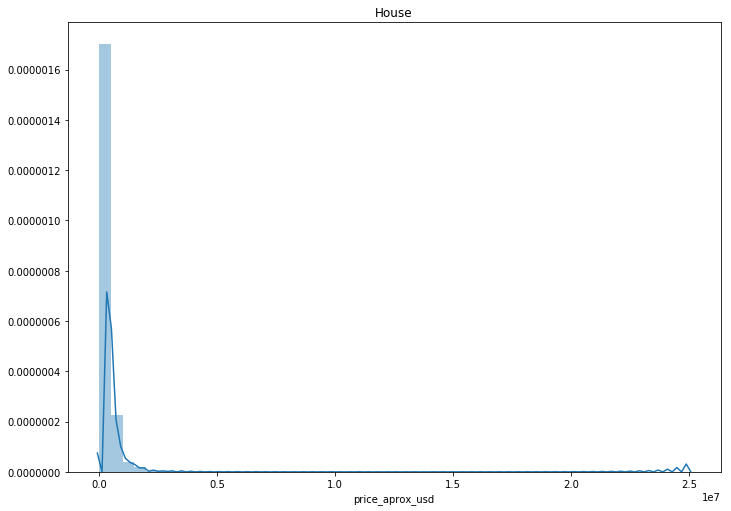

In [31]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.distplot(dsHouse.price_aprox_usd, ax=ax);

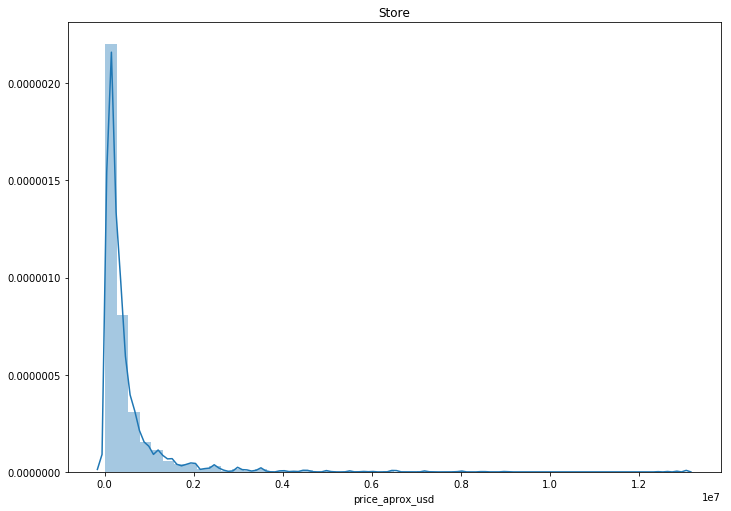

In [32]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.distplot(dsStore.price_aprox_usd, ax=ax);

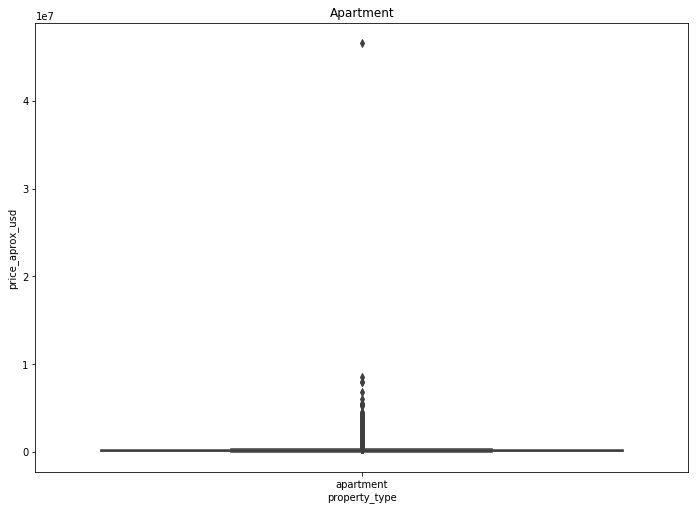

In [33]:
# grafico boxplot de price_aprox_usd para detectar outliers. En el grafico veo que a partir de 700 k ya es outlier
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.boxplot(ax=ax, x="property_type", y="price_aprox_usd", data=dsApartment);

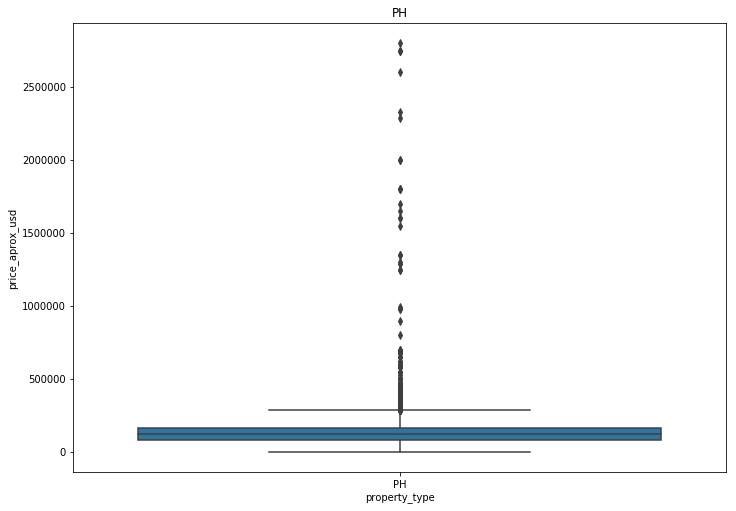

In [34]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.boxplot(ax=ax, x="property_type", y="price_aprox_usd", data=dsPH);

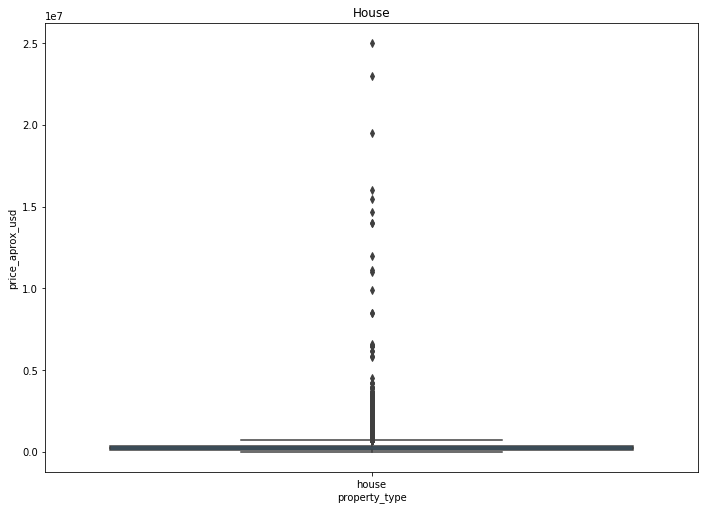

In [35]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.boxplot(ax=ax, x="property_type", y="price_aprox_usd", data=dsHouse);

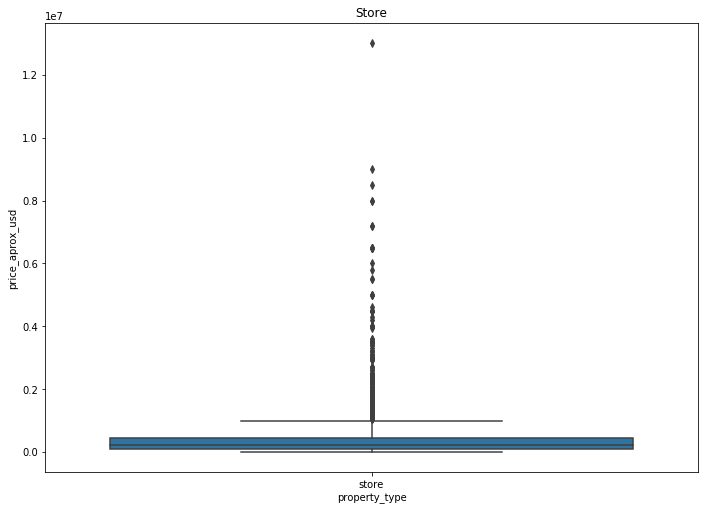

In [36]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.boxplot(ax=ax, x="property_type", y="price_aprox_usd", data=dsStore);

In [37]:
# cuento cantidad de outliers. 
#mask_outlier_price_aprox_usd= data_clean.price_aprox_usd > 700000
#print(mask_outlier_price_aprox_usd.sum())
#data_clean.loc[mask_outlier_price_aprox_usd].filter(['price_aprox_usd','price_usd_per_m2','place_name','surface_covered_in_m2','surface_total_in_m2'])

In [38]:
# reemplazo los outliers de price_apox_usd por NaN para no borrar información por el momento
#data_clean.loc[mask_outlier_price_aprox_usd, "price_aprox_usd"] = np.NaN

### Distribución de price_aprox_usd luego de eliminar outliers

In [39]:
dsApartment = data_clean[data_clean.property_type == "apartment"]
dsPH = data_clean[data_clean.property_type == "PH"]
dsHouse = data_clean[data_clean.property_type == "house"]
dsStore = data_clean[data_clean.property_type == "store"]

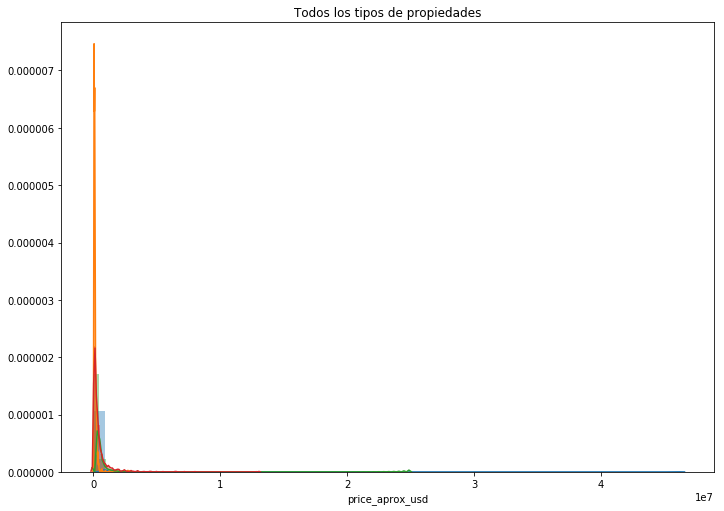

In [40]:
# veamos como se distribuye la variable price_aprox_usd
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Todos los tipos de propiedades")
sns.distplot(dsApartment.price_aprox_usd, ax=ax);
sns.distplot(dsPH.price_aprox_usd, ax=ax);
sns.distplot(dsHouse.price_aprox_usd, ax=ax);
sns.distplot(dsStore.price_aprox_usd, ax=ax);

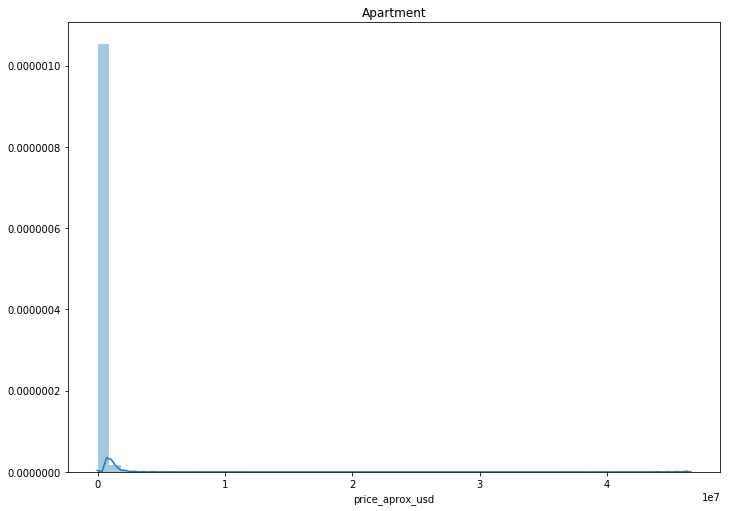

In [41]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.distplot(dsApartment.price_aprox_usd, ax=ax);

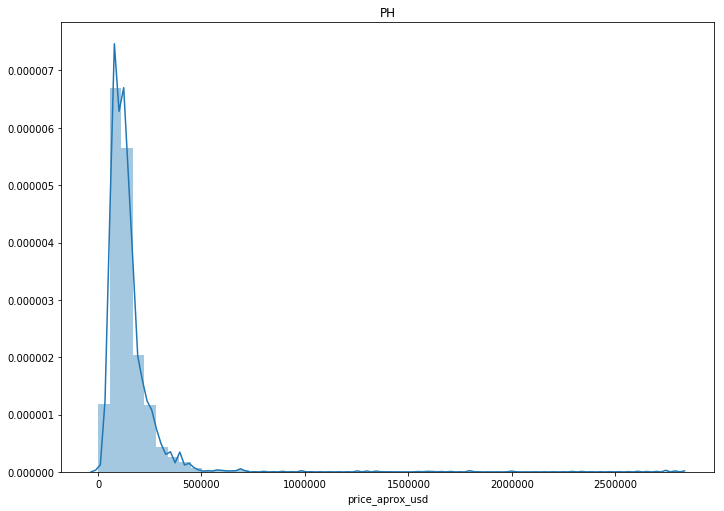

In [42]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.distplot(dsPH.price_aprox_usd, ax=ax);

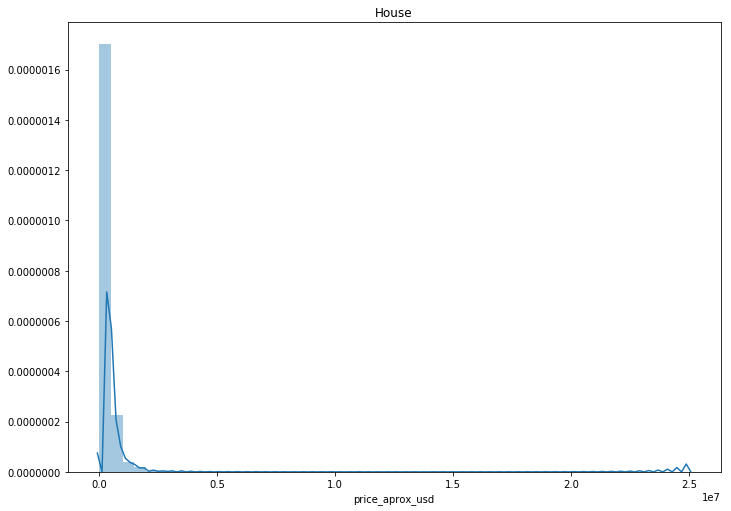

In [43]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.distplot(dsHouse.price_aprox_usd, ax=ax);

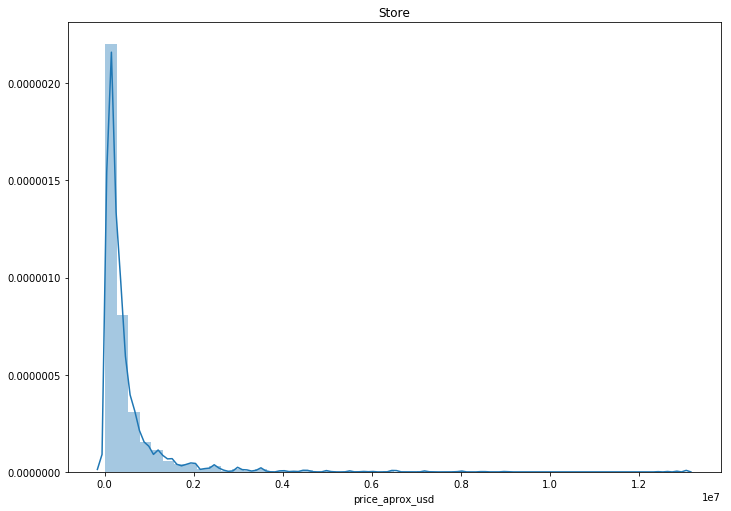

In [44]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.distplot(dsStore.price_aprox_usd, ax=ax);

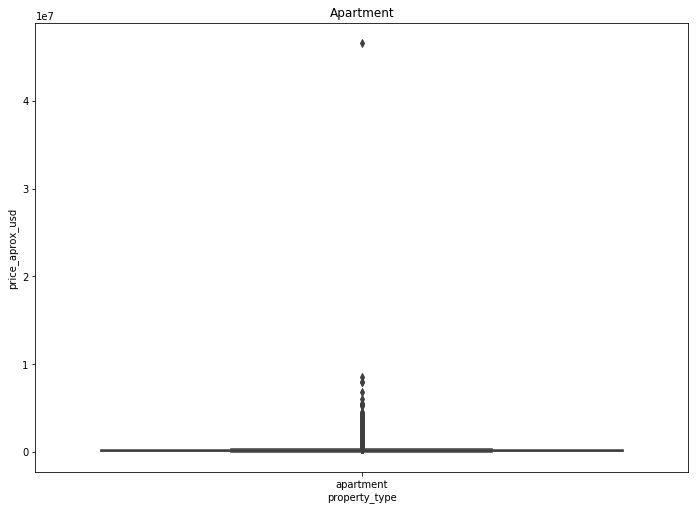

In [45]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.boxplot(ax=ax, x="property_type", y="price_aprox_usd", data=dsApartment);

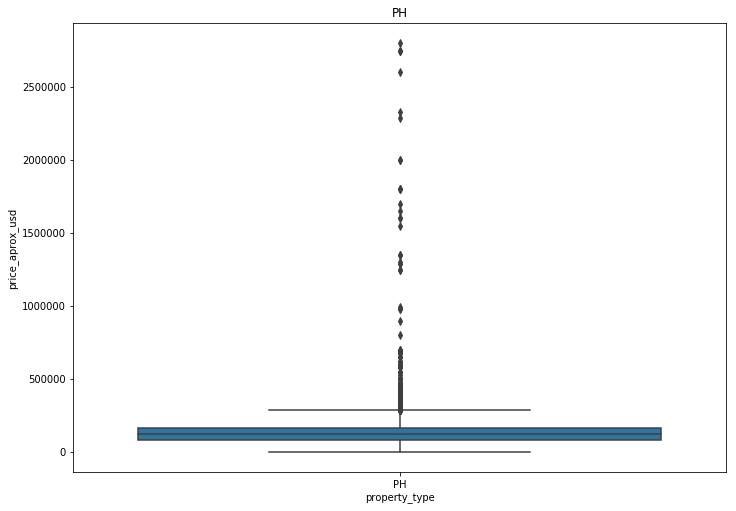

In [46]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.boxplot(ax=ax, x="property_type", y="price_aprox_usd", data=dsPH);

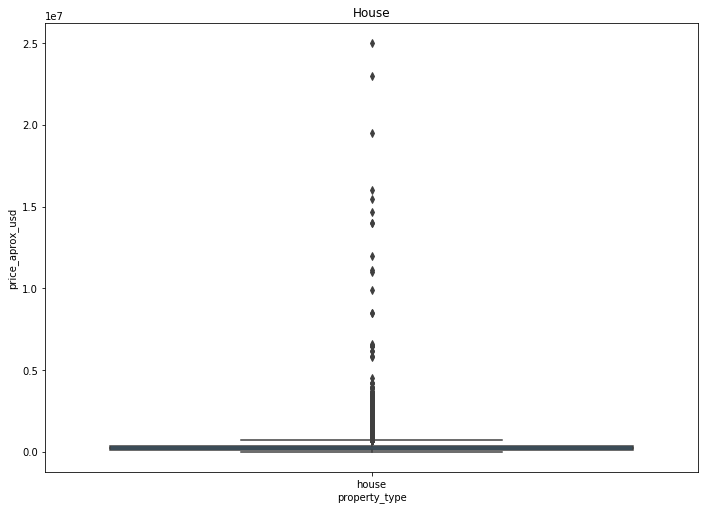

In [47]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.boxplot(ax=ax, x="property_type", y="price_aprox_usd", data=dsHouse);

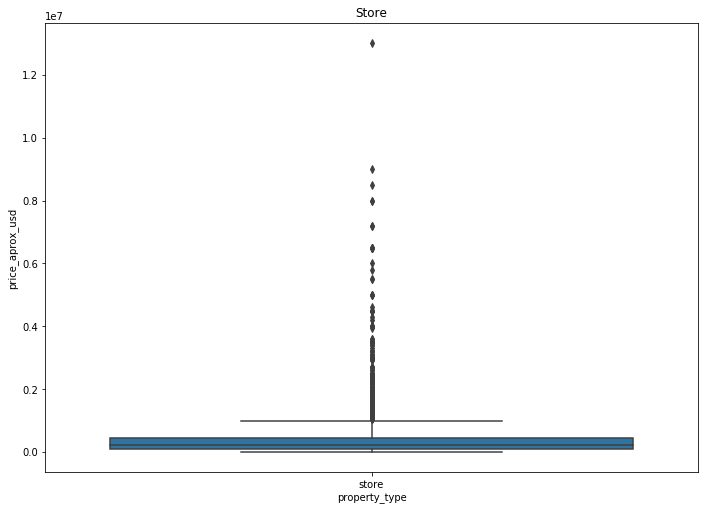

In [48]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.boxplot(ax=ax, x="property_type", y="price_aprox_usd", data=dsStore);

### Ver distribución y outliers de surface_covered_in_m2

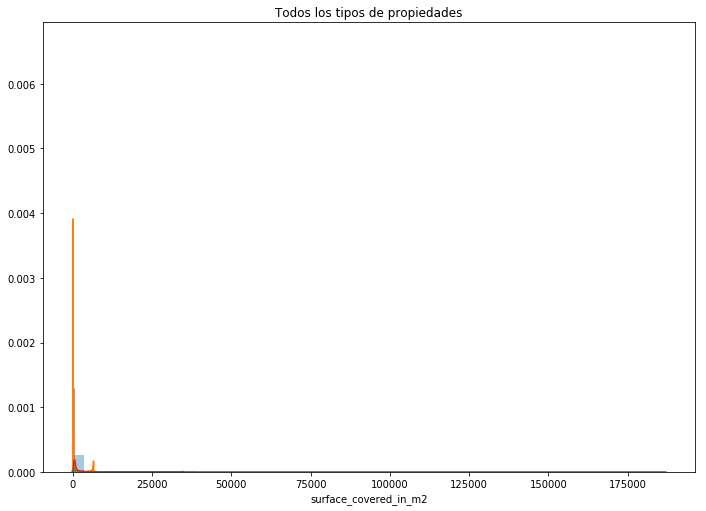

In [49]:
# veamos como se distribuye la variable surface_covered_in_m2
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Todos los tipos de propiedades")
sns.distplot(dsApartment.surface_covered_in_m2, ax=ax);
sns.distplot(dsPH.surface_covered_in_m2, ax=ax);
sns.distplot(dsHouse.surface_covered_in_m2, ax=ax);
sns.distplot(dsStore.surface_covered_in_m2, ax=ax);

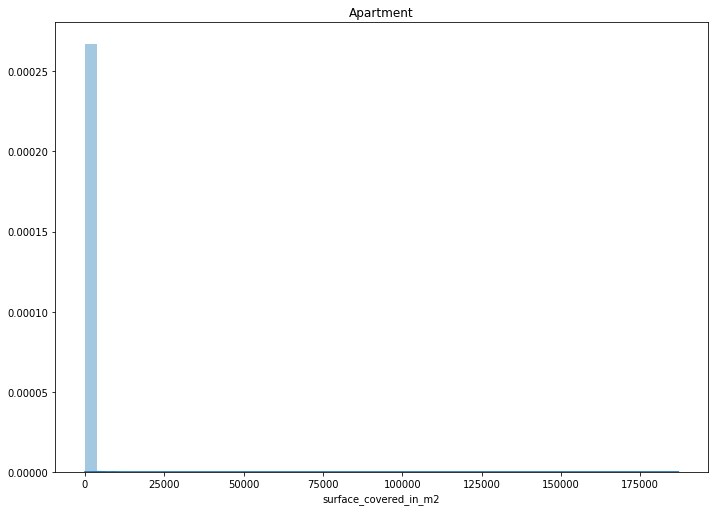

In [50]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.distplot(dsApartment.surface_covered_in_m2, ax=ax);

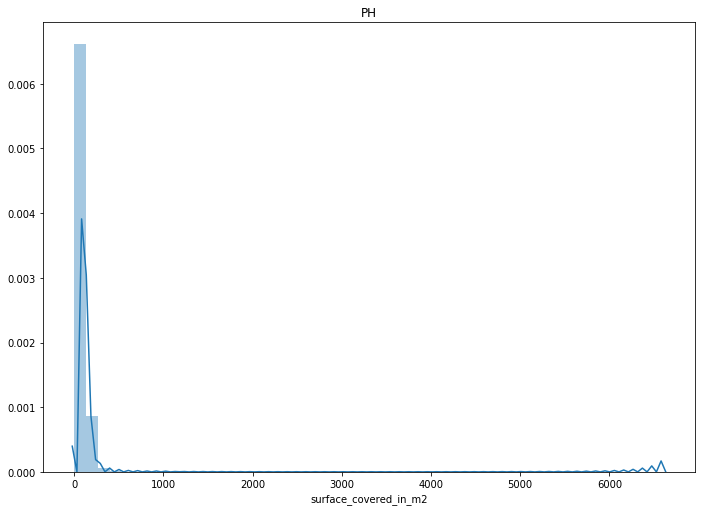

In [51]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.distplot(dsPH.surface_covered_in_m2, ax=ax);

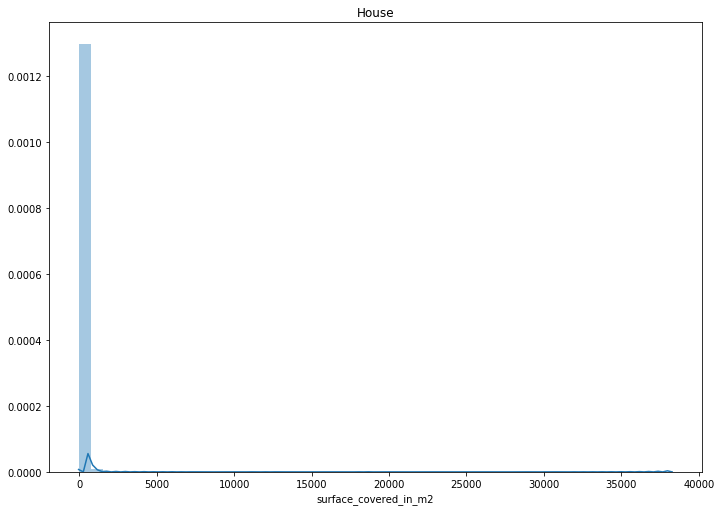

In [52]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.distplot(dsHouse.surface_covered_in_m2, ax=ax);

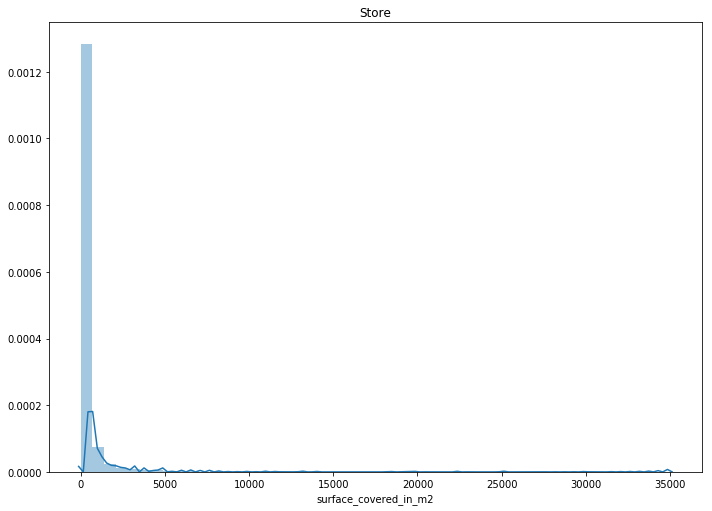

In [53]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.distplot(dsStore.surface_covered_in_m2, ax=ax);

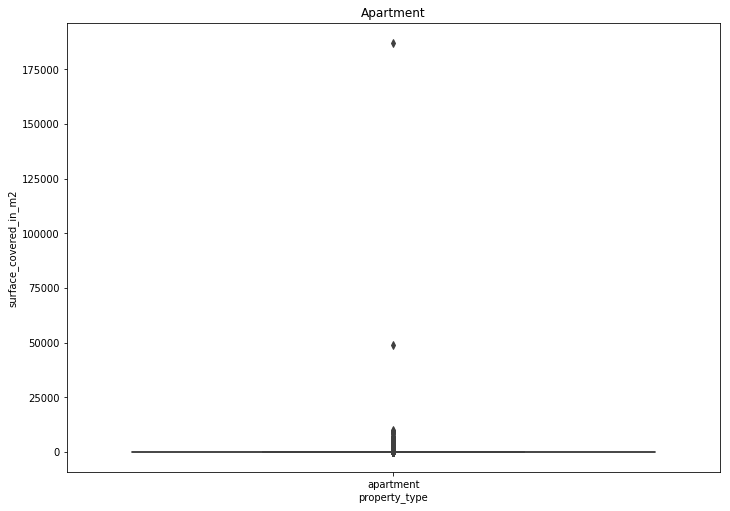

In [54]:
# grafico boxplot de surface_covered_in_m2 para detectar outliers. En el grafico veo que a partir de 600 m2 ya es outlier
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.boxplot(ax=ax, x="property_type", y="surface_covered_in_m2", data=dsApartment);

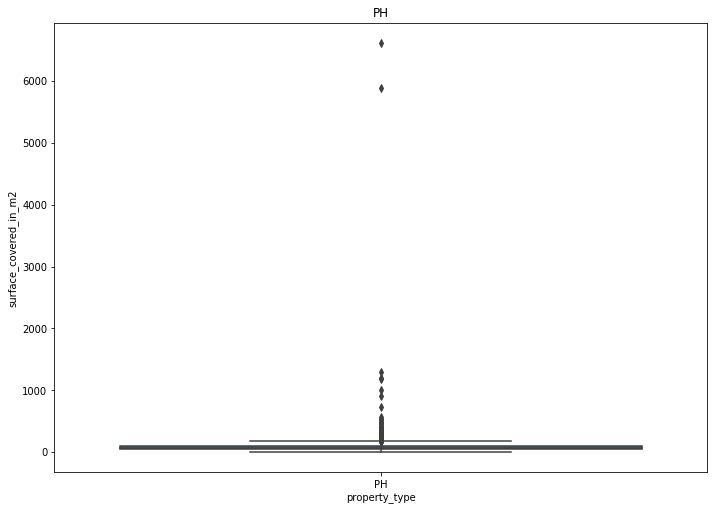

In [55]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.boxplot(ax=ax, x="property_type", y="surface_covered_in_m2", data=dsPH);

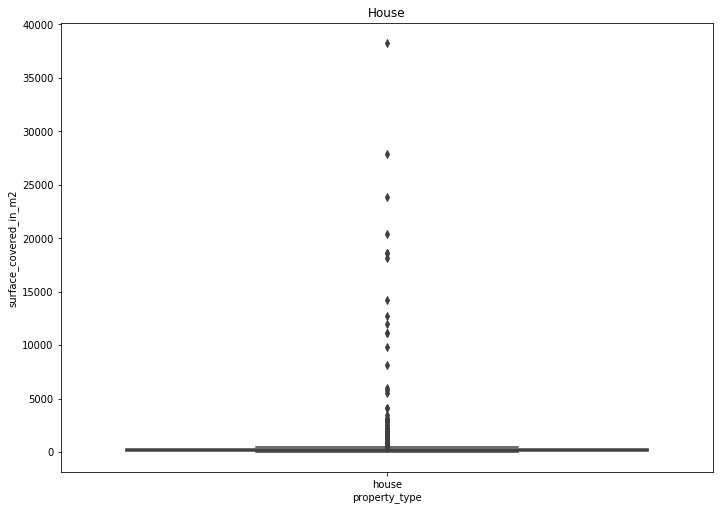

In [56]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.boxplot(ax=ax, x="property_type", y="surface_covered_in_m2", data=dsHouse);

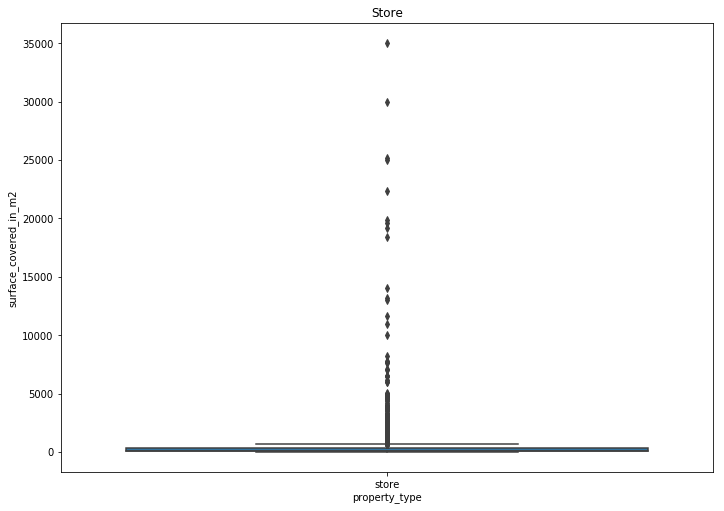

In [57]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.boxplot(ax=ax, x="property_type", y="surface_covered_in_m2", data=dsStore);

In [58]:
# identifico outliers.
mask_outlier_surface_covered = (data_clean.surface_covered_in_m2 > 500) | (data_clean.surface_covered_in_m2 < 15)
print(mask_outlier_surface_covered.sum())
#data_clean.loc[mask_outlier_surface_covered].filter(['price_aprox_usd','price_usd_per_m2','place_name','surface_covered_in_m2','surface_total_in_m2'])

2179


In [59]:
# reemplazo los outliers por NaN
data_clean.loc[mask_outlier_surface_covered, "surface_covered_in_m2"] = np.NaN

### Distribución de surface_covered_in_m2 luego de eliminar outliers

In [60]:
dsApartment = data_clean[data_clean.property_type == "apartment"]
dsPH = data_clean[data_clean.property_type == "PH"]
dsHouse = data_clean[data_clean.property_type == "house"]
dsStore = data_clean[data_clean.property_type == "store"]

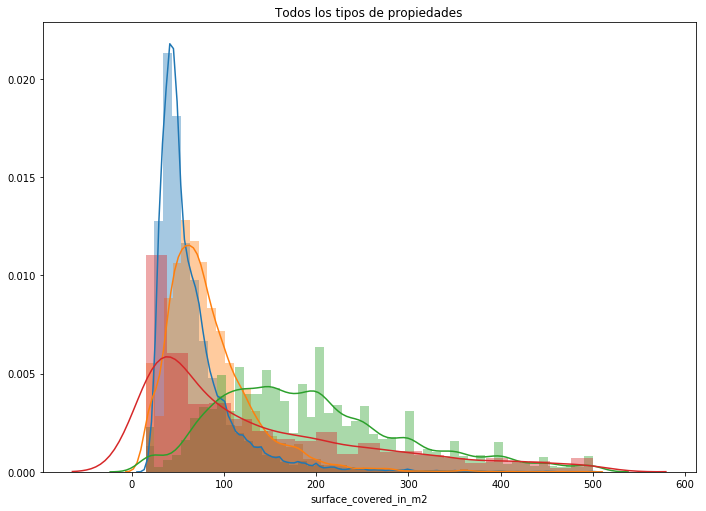

In [61]:
# veamos como se distribuye la variable price_aprox_usd
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Todos los tipos de propiedades")
sns.distplot(dsApartment.surface_covered_in_m2, ax=ax);
sns.distplot(dsPH.surface_covered_in_m2, ax=ax);
sns.distplot(dsHouse.surface_covered_in_m2, ax=ax);
sns.distplot(dsStore.surface_covered_in_m2, ax=ax);

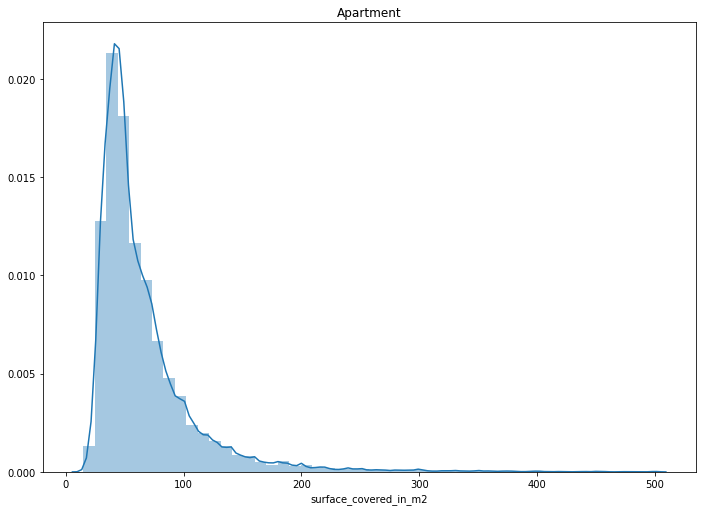

In [62]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.distplot(dsApartment.surface_covered_in_m2, ax=ax);

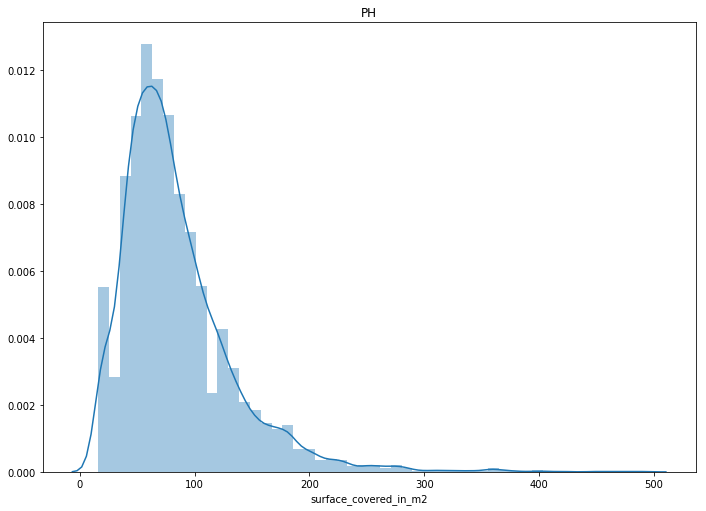

In [63]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.distplot(dsPH.surface_covered_in_m2, ax=ax);

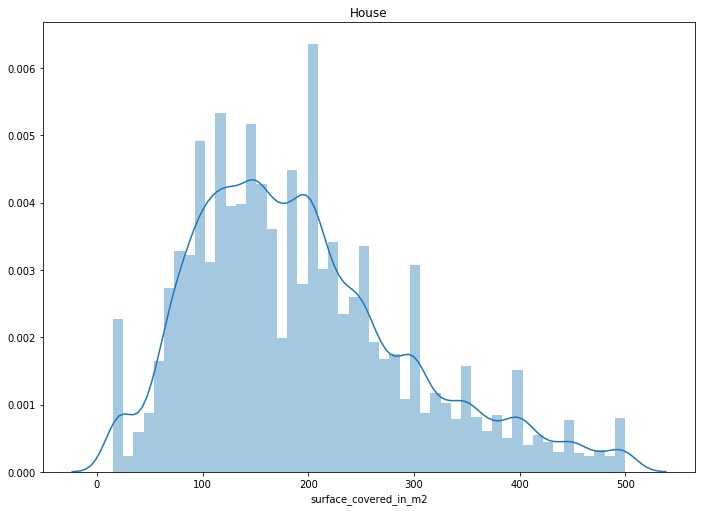

In [64]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.distplot(dsHouse.surface_covered_in_m2, ax=ax);

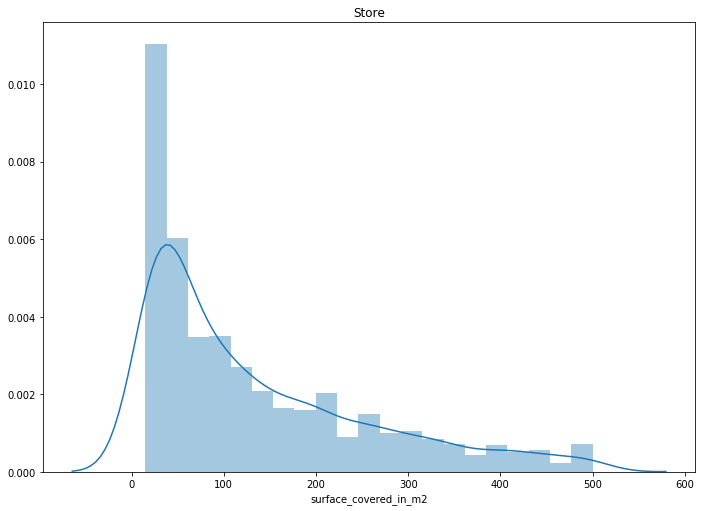

In [65]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.distplot(dsStore.surface_covered_in_m2, ax=ax);

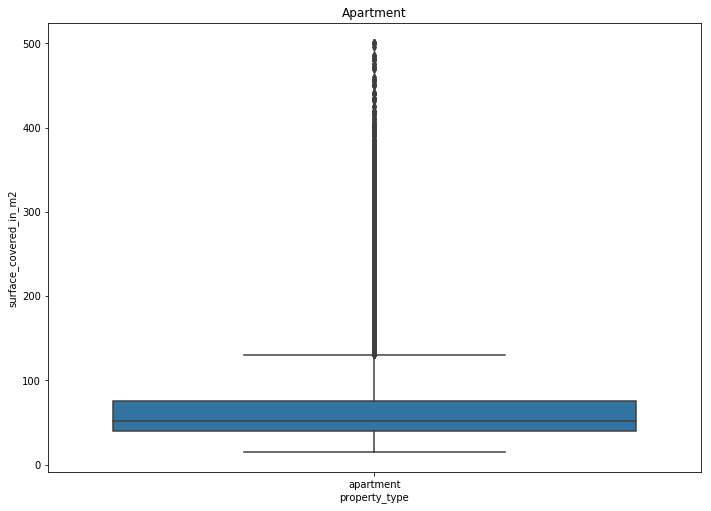

In [66]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.boxplot(ax=ax, x="property_type", y="surface_covered_in_m2", data=dsApartment);

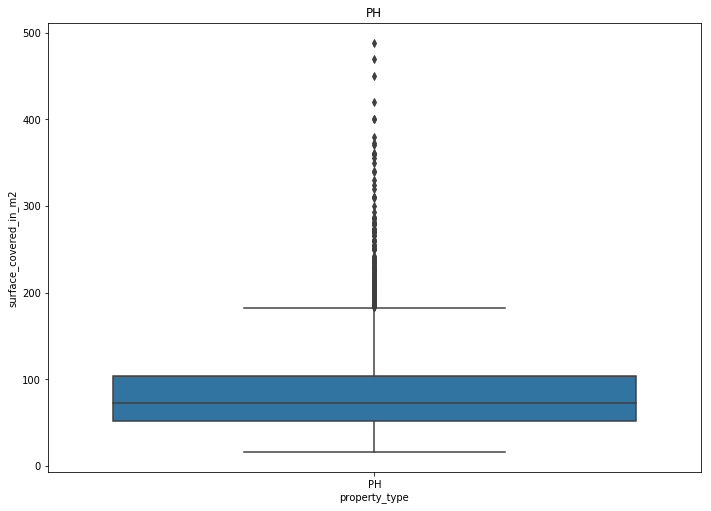

In [67]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.boxplot(ax=ax, x="property_type", y="surface_covered_in_m2", data=dsPH);

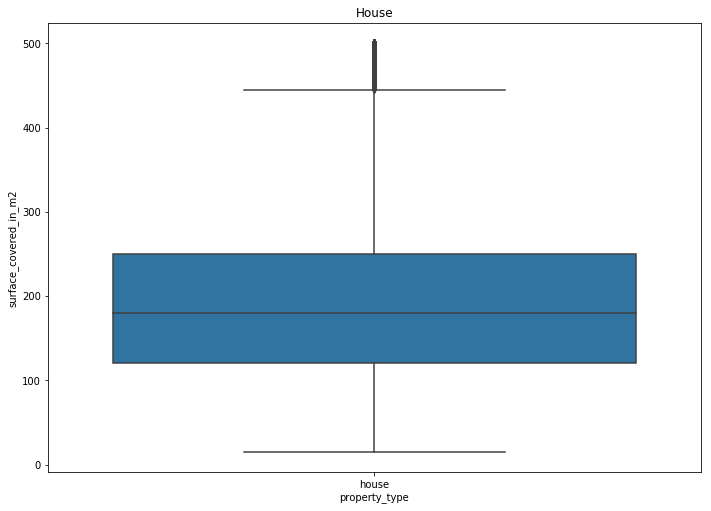

In [68]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.boxplot(ax=ax, x="property_type", y="surface_covered_in_m2", data=dsHouse);

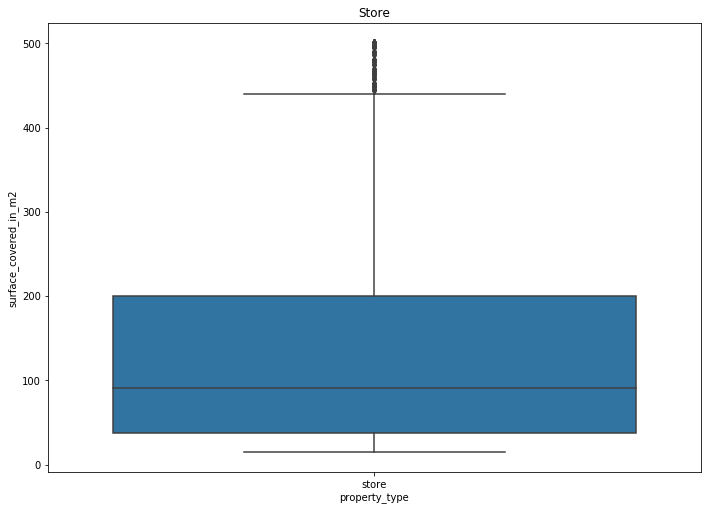

In [69]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.boxplot(ax=ax, x="property_type", y="surface_covered_in_m2", data=dsStore);

### Ver distribución y outliers de surface_total_in_m2

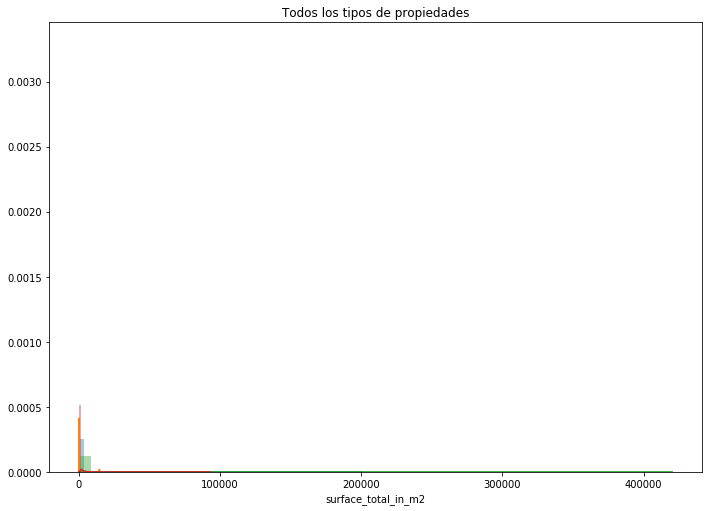

In [70]:
# veamos como se distribuye la variable surface_total_in_m2
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Todos los tipos de propiedades")
sns.distplot(dsApartment.surface_total_in_m2, ax=ax);
sns.distplot(dsPH.surface_total_in_m2, ax=ax);
sns.distplot(dsHouse.surface_total_in_m2, ax=ax);
sns.distplot(dsStore.surface_total_in_m2, ax=ax);

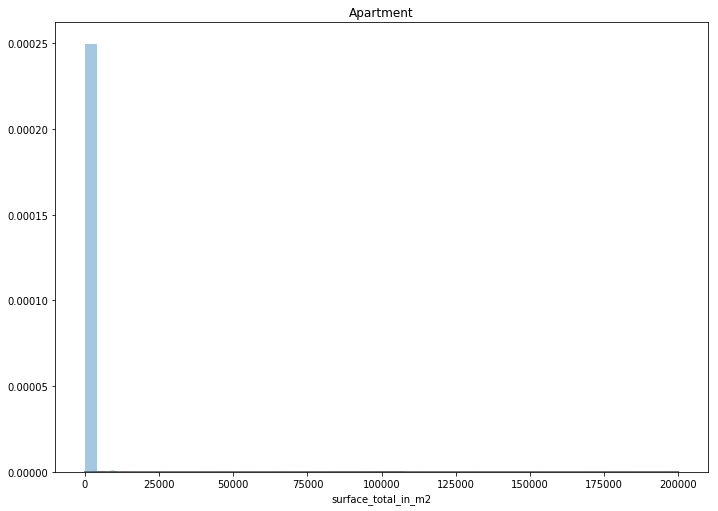

In [71]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.distplot(dsApartment.surface_total_in_m2, ax=ax);

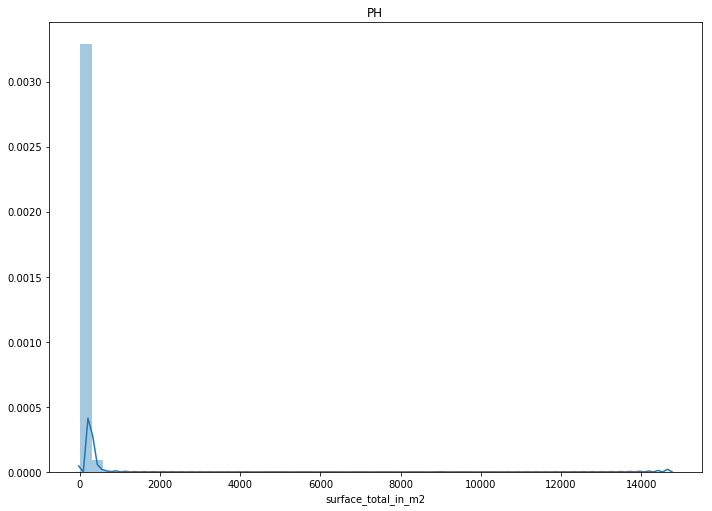

In [72]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.distplot(dsPH.surface_total_in_m2, ax=ax);

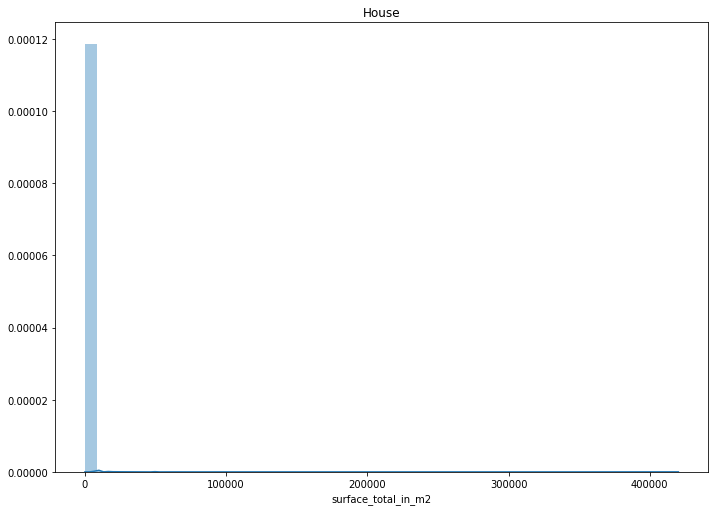

In [73]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.distplot(dsHouse.surface_total_in_m2, ax=ax);

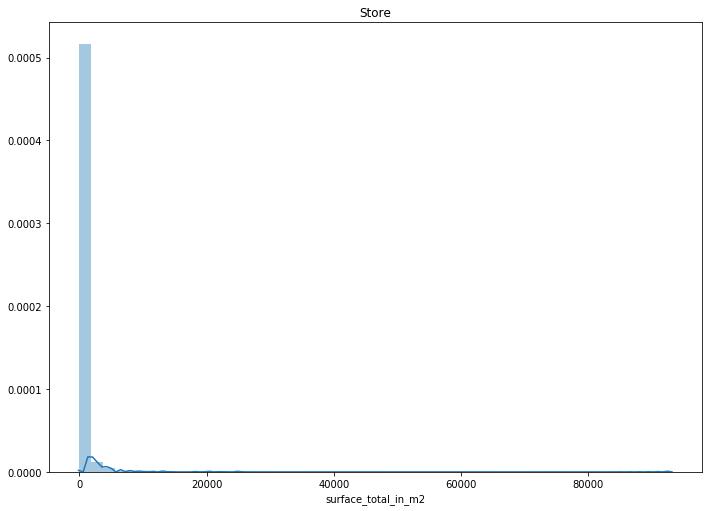

In [74]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.distplot(dsStore.surface_total_in_m2, ax=ax);

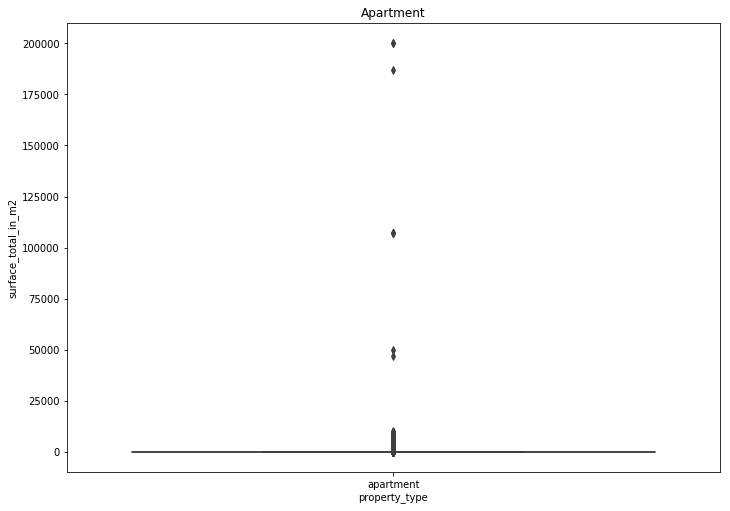

In [75]:
# grafico boxplot de surface_total_in_m2 para detectar outliers. En el grafico veo que a partir de 800 m2 ya es outlier
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.boxplot(ax=ax, x="property_type", y="surface_total_in_m2", data=dsApartment);

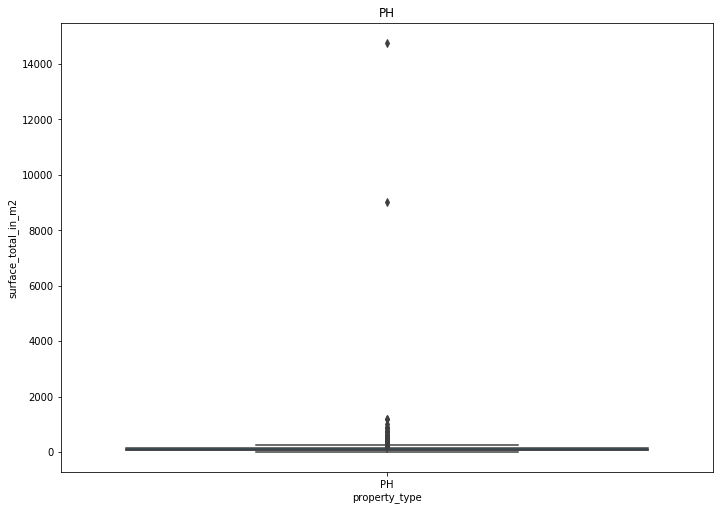

In [76]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.boxplot(ax=ax, x="property_type", y="surface_total_in_m2", data=dsPH);

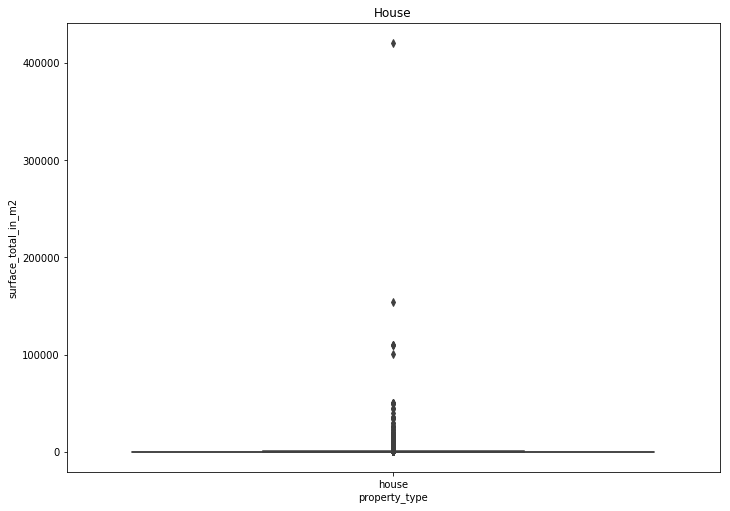

In [77]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.boxplot(ax=ax, x="property_type", y="surface_total_in_m2", data=dsHouse);

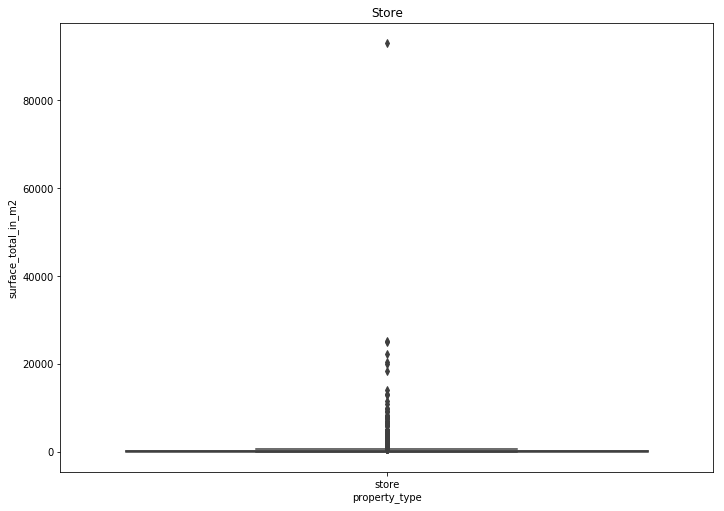

In [78]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.boxplot(ax=ax, x="property_type", y="surface_total_in_m2", data=dsStore);

In [79]:
# identifico outliers. Veo graficamente que tengo que sacar los mayores a 800 m2
mask_outlier_surface_total= (data_clean.surface_total_in_m2 > 700) | (data_clean.surface_total_in_m2 < 20)
print(mask_outlier_surface_total.sum())
#data_clean.loc[mask_outlier_surface_total].filter(['price_aprox_usd','price_usd_per_m2','place_name','surface_covered_in_m2','surface_total_in_m2'])

5511


In [80]:
# reemplazo outliers por NaN
data_clean.loc[mask_outlier_surface_total, "surface_total_in_m2"] = np.NaN

### Distribución de surface_total_in_m2 luego de eliminar outliers

In [81]:
dsApartment = data_clean[data_clean.property_type == "apartment"]
dsPH = data_clean[data_clean.property_type == "PH"]
dsHouse = data_clean[data_clean.property_type == "house"]
dsStore = data_clean[data_clean.property_type == "store"]

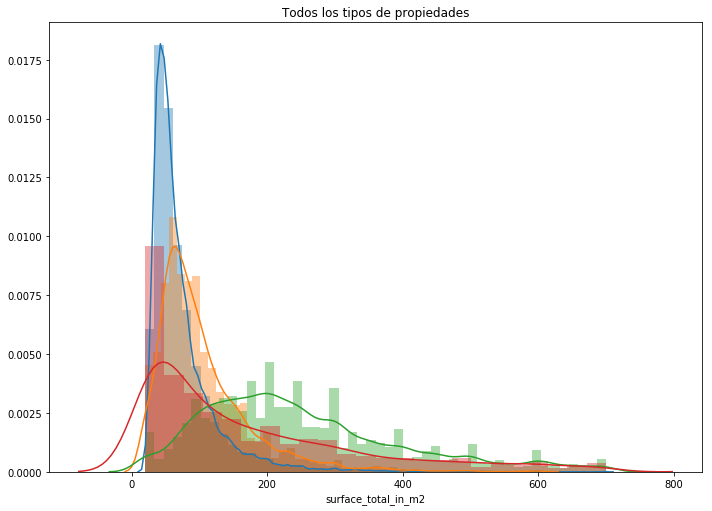

In [82]:
# veamos como se distribuye la variable surface_total_in_m2
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Todos los tipos de propiedades")
sns.distplot(dsApartment.surface_total_in_m2, ax=ax);
sns.distplot(dsPH.surface_total_in_m2, ax=ax);
sns.distplot(dsHouse.surface_total_in_m2, ax=ax);
sns.distplot(dsStore.surface_total_in_m2, ax=ax);

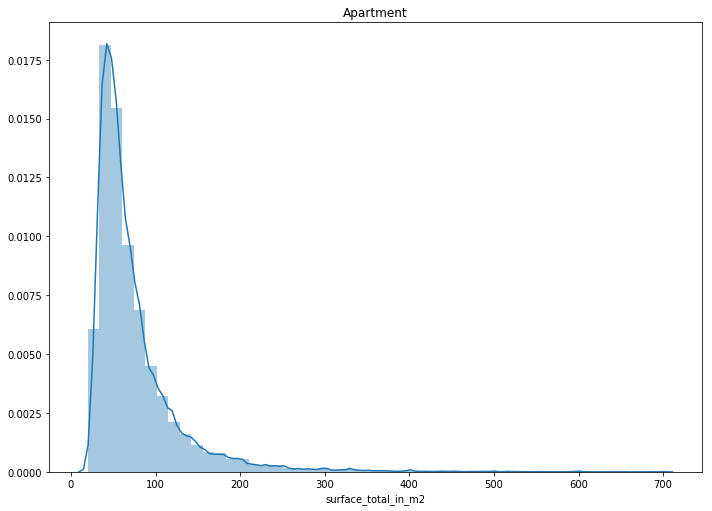

In [83]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.distplot(dsApartment.surface_total_in_m2, ax=ax);

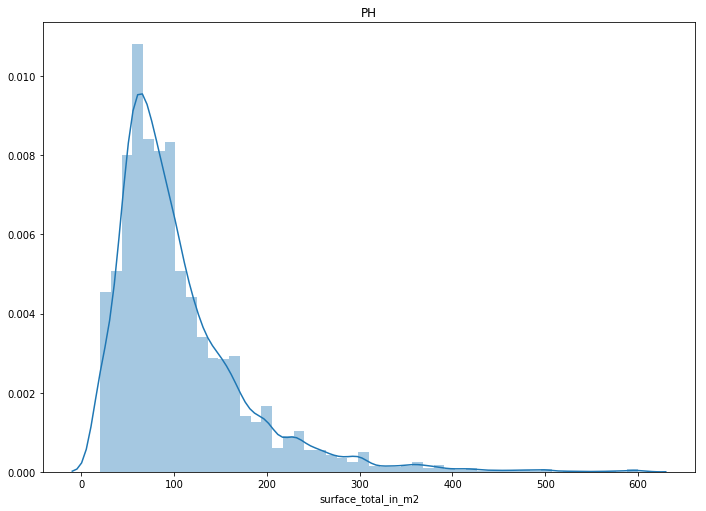

In [84]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.distplot(dsPH.surface_total_in_m2, ax=ax);

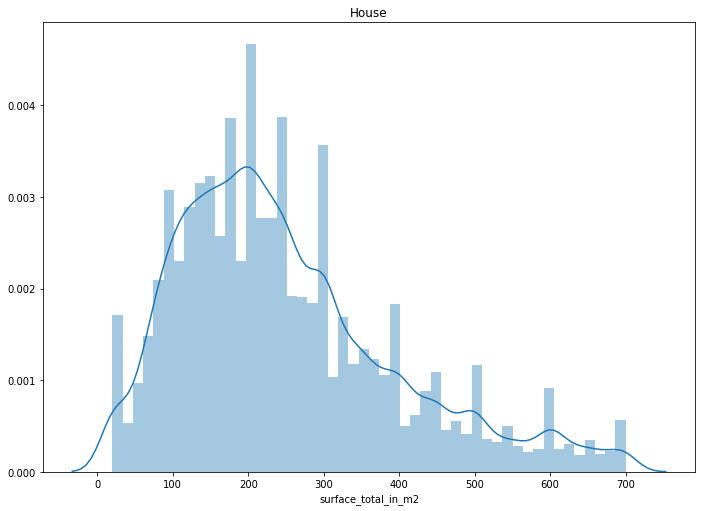

In [85]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.distplot(dsHouse.surface_total_in_m2, ax=ax);

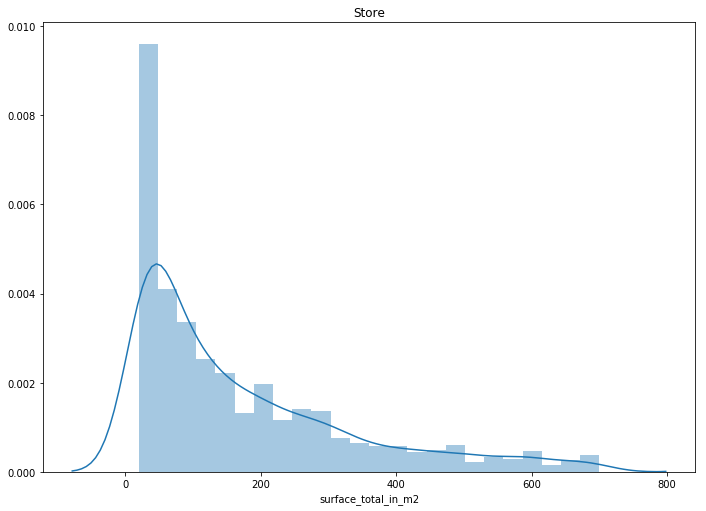

In [86]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.distplot(dsStore.surface_total_in_m2, ax=ax);

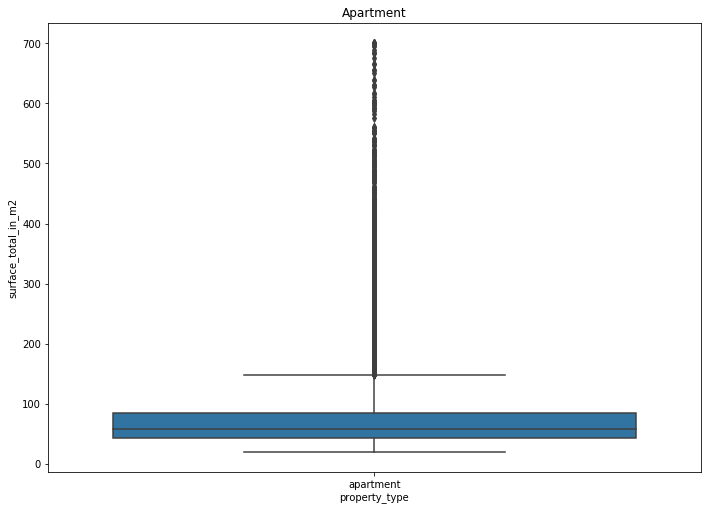

In [87]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Apartment")
sns.boxplot(ax=ax, x="property_type", y="surface_total_in_m2", data=dsApartment);

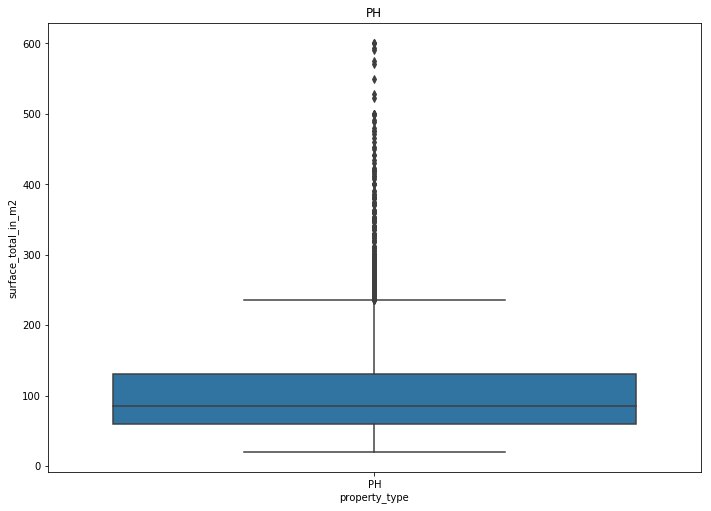

In [88]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("PH")
sns.boxplot(ax=ax, x="property_type", y="surface_total_in_m2", data=dsPH);

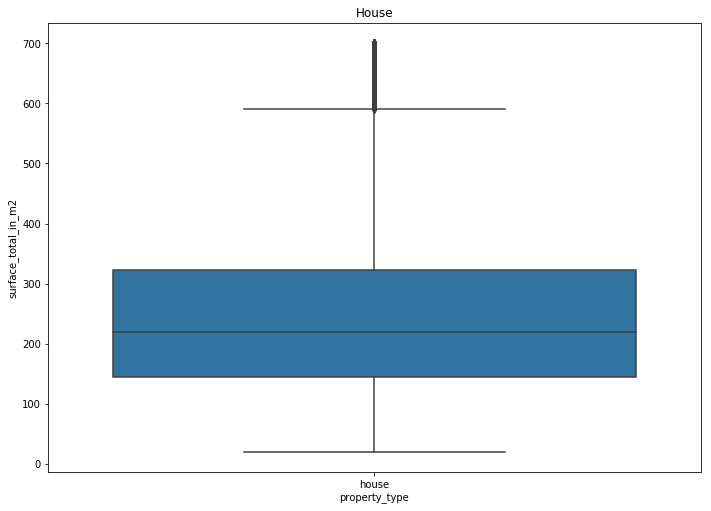

In [89]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("House")
sns.boxplot(ax=ax, x="property_type", y="surface_total_in_m2", data=dsHouse);

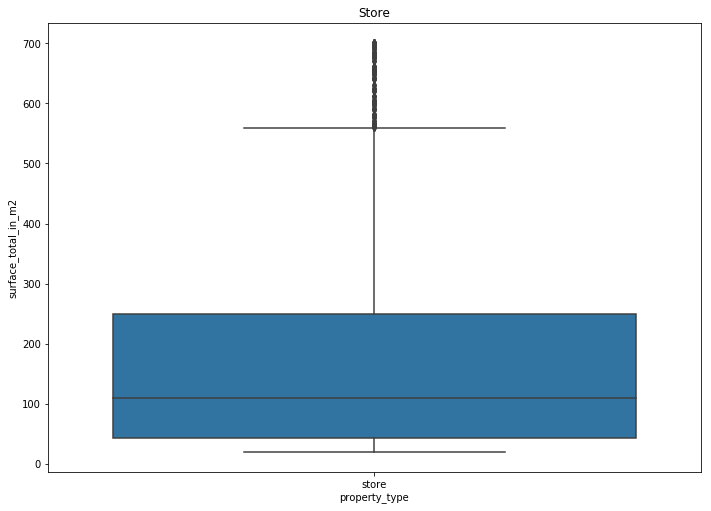

In [90]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Store")
sns.boxplot(ax=ax, x="property_type", y="surface_total_in_m2", data=dsStore);

In [91]:
# veamos si en algunos casos, surface_covered es mas grande que surface_total.
mask_surface= data_clean.surface_covered_in_m2 > data_clean.surface_total_in_m2
print(mask_surface.sum())
data_clean.loc[mask_surface].filter(['surface_total_in_m2','surface_covered_in_m2'])

3943


,surface_total_in_m2,surface_covered_in_m2
87,170.0,170.0
95,180.0,180.0
166,51.0,51.0
177,420.0,450.0
181,140.0,140.0
...,...,...
121053,70.0,70.0
121055,77.0,98.0
121066,330.0,330.0
121149,195.0,195.0


In [92]:
# intercambio las columnas de surface_covered con las de surface_total dentro de la mascara mask_surface
data_clean.loc[mask_surface,["surface_total_in_m2", "surface_covered_in_m2"]] = data_clean.loc[mask_surface,["surface_covered_in_m2","surface_total_in_m2"]].values


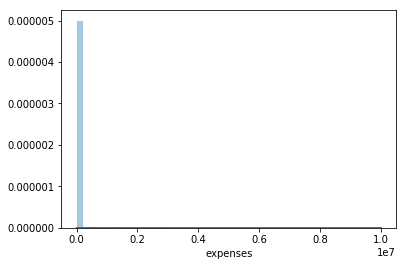

In [93]:
# vamos a ver como se distribuye la variable expenses
sns.distplot(data_clean.expenses);

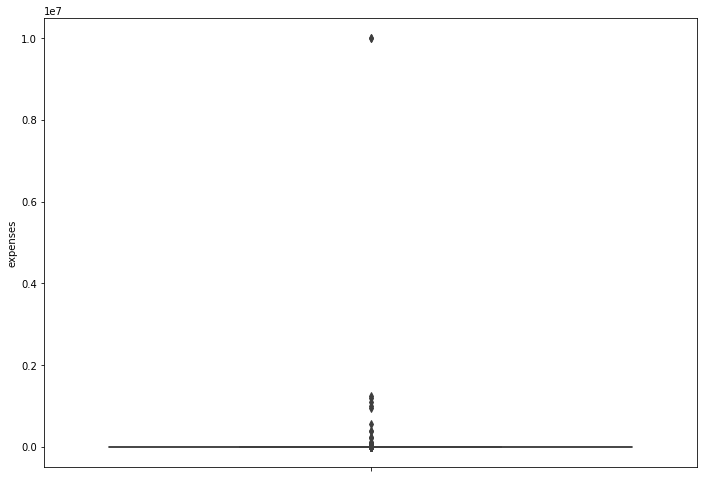

In [94]:
# deteccion de outliers
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, y="expenses", data=data_clean);

In [95]:
# consideramos outlier a partir de 30000 pesos
#mask_expenses= data_clean.expenses >= 30000
#mask_expenses.sum()

In [96]:
# reemplazo los outliers por NaN
#data_clean.loc[mask_expenses, "expenses"] = np.NaN

# expenses tiene mas del 88% de sus datos nulos
#data_clean.expenses.isnull().sum() / len(data_clean.expenses)

In [97]:
#data_clean.loc[mask_outlier_surface_total, "Outliers"] = "surface_total"
#data_clean.loc[mask_outlier_price_aprox_usd, "Outliers"] = "price_aprox_usd"
#data_clean.loc[mask_outliers_price_usd_m2, "Outliers"] = "price_usd_m2"

In [98]:
data_clean.drop(
    ['Unnamed: 0'], \
    axis=1, inplace=True)

In [99]:
data_clean.to_csv("CleanCSV/Clean04_Outliers.csv")